In [1]:
from src.data_processing import load_cmu
import itertools  
from pprint import pprint
from nltk.corpus import cmudict
import nltk
import xmltodict
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
# Removing stresses
cmu = cmudict.dict()
for key, val in cmu.items():
    for i, phoneme in enumerate(val):
        cmu[key][i] = list(map(lambda ph: ph[:2], phoneme))

In [3]:
task1 = []
task2 = []
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask1-heterographic-test.xml") as f:
    xmldict = xmltodict.parse(f.read())
    for sent in xmldict['corpus']['text']:
        task1.append({"words": [w['#text'] for w in sent['word'] if '#text' in w]})
        
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask1-heterographic-test.gold") as f:
    for i, line in enumerate(f.readlines()):
        task1[i]['pun'] = bool(int(line.split()[1]))
        
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask2-heterographic-test.xml") as f:
    xmldict = xmltodict.parse(f.read())
    for sent in xmldict['corpus']['text']:
        task2.append({"words": [w['#text'] for w in sent['word'] if '#text' in w]})
        
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask2-heterographic-test.gold") as f:
    for i, line in enumerate(f.readlines()):
        word_array = xmldict['corpus']['text'][i]['word']
        
        task2[i]['target'] = word_array[[w['@id'] for w in word_array].index(line.split()[1])]['#text']
        
task3 = []
with open("/home/doogy/Data/semeval2017_task7/data/test/subtask3-heterographic-test.gold") as f:
    for line in f.readlines():
        lsplit = line.split()
        left = list(set([w[:w.index('%')] for w in lsplit[1].split(';')]))
        right = list(set([w[:w.index('%')] for w in lsplit[2].split(';')]))
        task3.append((left, right))
        

In [5]:
min_pairs = []
from src.string_similarity import levenshtein

for targets, recoveries in task3:
    if len(targets) == 1 and len(recoveries) == 1:
        min_pairs.append((targets[0], recoveries[0]))
    else:
        min_distance = 1e10
        check = False
        for word1, word2 in itertools.product(targets, recoveries):
            if word1 in cmu and word2 in cmu:
                check = True
                distance = levenshtein(cmu[word1], cmu[word2])
                if distance < min_distance:
                    min_distance = distance
                    min_pair = (word1, word2)
                break
        if check:
            min_pairs.append(min_pair)
        else:
            min_pairs.append((targets[0], recoveries[0]))

In [6]:
min_pairs

[('allege', 'ledge'),
 ('coolly', 'cooly'),
 ('orifice', 'office'),
 ('gnu', 'news'),
 ('harried', 'hairy'),
 ('stair', 'stare'),
 ('archly', 'arch'),
 ('hertz', 'hurt'),
 ('dye', 'die'),
 ('know', 'nose'),
 ('maid', 'make'),
 ('knowingly', 'no'),
 ('octave', 'active'),
 ('punctually', 'puncture'),
 ('psalm', 'arm'),
 ('thick', 'sick'),
 ('sole', 'sell'),
 ('hostel', 'hostile'),
 ('accord', 'chord'),
 ('knotty', 'naughty'),
 ('humorlessly', 'humerus'),
 ('cannily', 'cannes'),
 ('lute', 'loot'),
 ('congealed', 'concealed'),
 ('hart', 'heart'),
 ('mutter', 'mother'),
 ('bovine', 'divine'),
 ('era', 'ear'),
 ('reptile', 'tile'),
 ('quart', 'court'),
 ('lint', 'lend'),
 ('mood', 'moo'),
 ('offal', 'awful'),
 ('crummy', 'crumb'),
 ('sail', 'sale'),
 ('mine', 'mind'),
 ('toad', 'tow'),
 ('candied', 'candid'),
 ('mansion', 'mention'),
 ('bark', 'bach'),
 ('throng', 'wrong'),
 ('pane', 'pain'),
 ('hole', 'whole'),
 ('stiltedly', 'stilt'),
 ('sari', 'sorry'),
 ('cash', 'cache'),
 ('pasta', 'pas

In [5]:
from statistics import *
levenshtein_distances = [levenshtein(w1, w2) for w1, w2 in min_pairs]
print("Mean: ", mean(levenshtein_distances))
print("Mode: ", mode(levenshtein_distances))
print("STD: ", stdev(levenshtein_distances))
print("Min: ", min(levenshtein_distances))
print("Max: ", max(levenshtein_distances))

Mean:  2.4280510018214936
Mode:  2
STD:  1.40866443375039
Min:  0
Max:  10


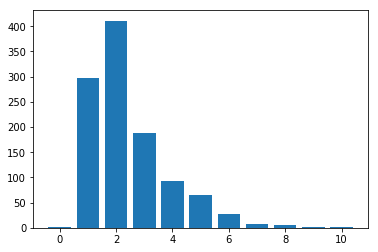

In [7]:
c = Counter(levenshtein_distances)
plt.bar(c.keys(), c.values())
plt.show()

In [8]:
pairs_in_cmu = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu]
shared_first_phoneme = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu and cmu[w1][0] == cmu[w2][0]]
first_letter_first_phoneme = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu 
                              and cmu[w1][0][0] == cmu[w2][0][0]]
print("Number sharing same first phoneme: ", len(shared_first_phoneme) / len(pairs_in_cmu))
print("Number with same first letter: ", len([_ for w1, w2 in min_pairs if w1[0] == w2[0]]) / len(min_pairs))
print("First letter first phoneme: ", len(first_letter_first_phoneme) / len(pairs_in_cmu))

Number sharing same first phoneme:  0.31875
Number with same first letter:  0.802367941712204
First letter first phoneme:  0.85


In [1]:
from src.data_processing import print_progress, load_cmu
import json
seen = set()
cmu = load_cmu()

with open("data/ngram_searchspace/ngram_totals.json") as f:
    db = json.load(f)

In [7]:
from src.pronunciations import phonetic_translation
import string
new_cmu = {}

In [9]:
# seen = set()
ascii_set = set(string.ascii_uppercase + string.ascii_lowercase)
for i, pun in enumerate(db):
    print_progress(i, len(db))
    
    for og, subs in pun.items():

        og_word = og.split()[1].lower()
        if og_word not in cmu and og_word not in seen:
            try:
                new_cmu[og_word] = [phonetic_translation(og_word)]
                seen.add(og_word)
            except:
                seen.add(og_word)
                pass
        for sub in subs['substitutions']:
            s_word = sub.split()[1].lower()
            if not ascii_set.issuperset(s_word):
                continue
            if s_word not in cmu and s_word not in seen:
                try:
                    new_cmu[s_word] = [phonetic_translation(s_word)]
                    seen.add(s_word)
                except IndexError:
                    seen.add(s_word)
                    pass
                except KeyboardInterrupt:
                    print("Seen: {}".format(len(seen)))
                except:
                    print(s_word)
                    raise
                    seen.add(s_word)
                    pass

 |----------------------------------------------------------------------------------------------------| 0.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


Seen: 316
Seen: 342
 |----------------------------------------------------------------------------------------------------| 0.1% Seen: 354
 |----------------------------------------------------------------------------------------------------| 0.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: 

Seen: 18931


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Seen: 35514


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


Seen: 38422


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: e
Unrecognized ipa: e
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: 

Seen: 57922


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Seen: 75221


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: e
Unrecognized ipa: e
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: 

 |----------------------------------------------------------------------------------------------------| 0.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |----------------------------------------------------------------------------------------------------| 0.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ɫ
Unrecognized ipa: ɫ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: 

 |█---------------------------------------------------------------------------------------------------| 0.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█---------------------------------------------------------------------------------------------------| 0.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█---------------------------------------------------------------------------------------------------| 0.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█---------------------------------------------------------------------------------------------------| 0.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ç
Unrecognized ipa: ç
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█---------------------------------------------------------------------------------------------------| 1.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█---------------------------------------------------------------------------------------------------| 1.1% 

Unrecognized ipa: (fr)
Unrecognized ipa: (fr)
Unrecognized ipa: ø
Unrecognized ipa: ø
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ


 |██--------------------------------------------------------------------------------------------------| 1.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██--------------------------------------------------------------------------------------------------| 1.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██--------------------------------------------------------------------------------------------------| 2.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██--------------------------------------------------------------------------------------------------| 2.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: 

 |██--------------------------------------------------------------------------------------------------| 2.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: əɹ
Unrecognized ipa: əɹ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa

Seen: 157965


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ç
Unrecognized ipa: ç
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███-------------------------------------------------------------------------------------------------| 3.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███-------------------------------------------------------------------------------------------------| 3.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███-------------------------------------------------------------------------------------------------| 3.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███-------------------------------------------------------------------------------------------------| 3.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████------------------------------------------------------------------------------------------------| 3.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████------------------------------------------------------------------------------------------------| 3.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████------------------------------------------------------------------------------------------------| 4.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████-----------------------------------------------------------------------------------------------| 4.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████-----------------------------------------------------------------------------------------------| 4.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████-----------------------------------------------------------------------------------------------| 4.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Seen: 185706


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Seen: 194612


Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |█████-----------------------------------------------------------------------------------------------| 4.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████-----------------------------------------------------------------------------------------------| 5.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████-----------------------------------------------------------------------------------------------| 5.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |██████----------------------------------------------------------------------------------------------| 5.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████----------------------------------------------------------------------------------------------| 5.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████----------------------------------------------------------------------------------------------| 5.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |██████----------------------------------------------------------------------------------------------| 6.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ


 |██████----------------------------------------------------------------------------------------------| 6.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████----------------------------------------------------------------------------------------------| 6.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████---------------------------------------------------------------------------------------------| 6.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████---------------------------------------------------------------------------------------------| 6.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████---------------------------------------------------------------------------------------------| 6.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████---------------------------------------------------------------------------------------------| 7.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████---------------------------------------------------------------------------------------------| 7.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa

Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |███████---------------------------------------------------------------------------------------------| 7.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████--------------------------------------------------------------------------------------------| 7.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████--------------------------------------------------------------------------------------------| 7.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████--------------------------------------------------------------------------------------------| 7.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████--------------------------------------------------------------------------------------------| 7.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████--------------------------------------------------------------------------------------------| 8.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████-------------------------------------------------------------------------------------------| 8.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |█████████-------------------------------------------------------------------------------------------| 8.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████-------------------------------------------------------------------------------------------| 9.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████------------------------------------------------------------------------------------------| 9.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████------------------------------------------------------------------------------------------| 10.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████------------------------------------------------------------------------------------------| 10.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████-----------------------------------------------------------------------------------------| 10.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████-----------------------------------------------------------------------------------------| 10.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████----------------------------------------------------------------------------------------| 11.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████----------------------------------------------------------------------------------------| 11.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████---------------------------------------------------------------------------------------| 12.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████--------------------------------------------------------------------------------------| 13.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████--------------------------------------------------------------------------------------| 14.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████-------------------------------------------------------------------------------------| 15.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████------------------------------------------------------------------------------------| 15.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████------------------------------------------------------------------------------------| 16.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████-----------------------------------------------------------------------------------| 17.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████----------------------------------------------------------------------------------| 18.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████---------------------------------------------------------------------------------| 18.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████---------------------------------------------------------------------------------| 18.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████---------------------------------------------------------------------------------| 18.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████--------------------------------------------------------------------------------| 19.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████-------------------------------------------------------------------------------| 20.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |█████████████████████-------------------------------------------------------------------------------| 20.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████-------------------------------------------------------------------------------| 21.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████-------------------------------------------------------------------------------| 21.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████-----------------------------------------------------------------------------| 23.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████-----------------------------------------------------------------------------| 23.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████----------------------------------------------------------------------------| 24.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████---------------------------------------------------------------------------| 24.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████-------------------------------------------------------------------------| 27.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████------------------------------------------------------------------------| 27.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████------------------------------------------------------------------------| 28.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████-----------------------------------------------------------------------| 28.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████-----------------------------------------------------------------------| 29.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████---------------------------------------------------------------------| 30.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████---------------------------------------------------------------------| 30.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████---------------------------------------------------------------------| 31.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████------------------------------------------------------------------| 33.6% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████------------------------------------------------------------------| 34.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████----------------------------------------------------------------| 35.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████---------------------------------------------------------------| 36.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████---------------------------------------------------------------| 37.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████--------------------------------------------------------------| 38.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████-------------------------------------------------------------| 38.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████-------------------------------------------------------------| 38.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████-------------------------------------------------------------| 38.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████-----------------------------------------------------------| 41.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |█████████████████████████████████████████████-------------------------------------------------------| 44.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████-------------------------------------------------------| 45.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████-----------------------------------------------------| 46.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████----------------------------------------------------| 47.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████████---------------------------------------------------| 48.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████████---------------------------------------------------| 49.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████████████████--------------------------------------------------| 50.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████------------------------------------------------| 52.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████████████████████----------------------------------------------| 54.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████---------------------------------------------| 55.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████████--------------------------------------------| 55.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████████████████████████------------------------------------------| 57.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |██████████████████████████████████████████████████████████------------------------------------------| 57.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████████-----------------------------------------| 58.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████████████----------------------------------------| 59.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████████████----------------------------------------| 60.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████████████████████████████--------------------------------------| 61.7% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████████████████████████████--------------------------------------| 61.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████████████-------------------------------------| 63.0% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████████████████------------------------------------| 63.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████████████████████████████████----------------------------------| 66.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |██████████████████████████████████████████████████████████████████----------------------------------| 66.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |██████████████████████████████████████████████████████████████████----------------------------------| 66.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████████████████████--------------------------------| 68.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████████████████████-----------------------------| 71.1% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████████████████████████████████---------------------------| 73.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa

 |██████████████████████████████████████████████████████████████████████████--------------------------| 74.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████████████████████████████████████-----------------------| 77.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████████████████████████████---------------------| 79.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████████████████████████████████████████-------------------| 80.8% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████████████████████████████████████████████---------------| 84.9% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ɫ
Unrecognized ipa: ɫ
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩
Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████████████████████████████████████-------------| 87.4% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████████████████████████████████████-------------| 87.5% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |█████████████████████████████████████████████████████████████████████████████████████████-----------| 89.3% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████████████████████████████████████████████████----| 96.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.2% 

Unrecognized ipa: ʔ
Unrecognized ipa: ʔ
Unrecognized ipa: n̩
Unrecognized ipa: n̩


 |████████████████████████████████████████████████████████████████████████████████████████████████████| 99.9% 

In [10]:
len(seen)

1064671

In [12]:
with open("corpus/new_cmu.json", 'w') as f:
    json.dump(new_cmu, f)

In [26]:
seen

{'aarb',
 'ahnenerbe',
 'a556',
 'afbcmr',
 'alsek',
 '17km',
 '11s',
 '970mp',
 '601',
 '1939',
 'acoela',
 'aleuts',
 'afdf',
 '8.5',
 'aalco',
 'acmsf',
 '800xl',
 'afrcc',
 'aic33',
 '7700',
 '55mm',
 'a12',
 'abilify',
 '7300',
 '1430s',
 'alero',
 'aswcc',
 '7205',
 '1q05',
 'alphasmarts',
 '20lb',
 '8d',
 'atss',
 'at1010',
 'iodized',
 '1280x1024',
 'alawites',
 'accesskey',
 'asus',
 '000',
 'aqtf',
 '1120s',
 '1470s',
 '196th',
 '1v',
 '86th',
 'almanacs',
 'atma',
 'amanas',
 'aleut',
 'calligraphers',
 '1730s',
 'aiel',
 'alejari',
 'a1065',
 'aawc',
 'avhrr',
 '80m',
 '5-3',
 '1-3-1',
 '50m',
 'afsluitdijk',
 '30xs955',
 'acushnet',
 '3wh',
 '770ed',
 'auc',
 'allstar',
 'aqm',
 '404',
 'ahmadis',
 'eg',
 'accessswitch',
 'aldwych',
 'amarone',
 '209',
 '5550',
 'coolies',
 'drily',
 '1841',
 'sluts',
 'albufera',
 'wolfberries',
 'alphaserver',
 '1990ies',
 'ghd',
 '1886',
 'koulopoulos',
 '001',
 '3d',
 'aich',
 'alds',
 '5u',
 'sunflowerseed',
 '80mm',
 '350z',
 'howto'

In [17]:
new_cmu['toblerone']

[['T', 'AA', 'B', 'L', 'R', 'OW', 'N']]